# Занятие 10. Проект построения простой модели машинного обучения

Веберите любые данные для задачи классификации из репозитория данных для машинного обучения (UCI Machine learning repository: http://archive.ics.uci.edu/ml/index.php) или возьмите свои данные и постройте простую модель машинного обучения в соответствии с приведенной ниже схемой. Комментарии к каждому разделу обязательны.

*Выполнил:* Бронников Егор ПМ-1901

*Последнее изменение:* 13/12/2021

### 1. Loading the libraries and the dataset

In [1]:
from pandas import read_csv
from pandas.plotting import scatter_matrix
from matplotlib import pyplot
from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC

### Данные

*Источник:* https://github.com/jbrownlee/Datasets

*Название:* **Cancer (Haberman's)**

### Описание данных

Данные о пациентах больных раком.

### Описание полей

1. **age** — возраст пациента;
1. **operation_year** — год операции 19##;
1. **axillary_nodes** — количество обнаруженных положительных узлов;
1. **survival_status** — выживаемость после операции:
    - 1 $-$ пациент прожил 5 лет и более 
    - 2 $-$ пациент умер в течение 5 лет

In [2]:
filename = "haberman.csv"
names = ["age", "operation_year", "axillary_nodes", "survival_status"]
dataframe = read_csv(filename, names=names)
array = dataframe.values
dataframe.head()

,age,operation_year,axillary_nodes,survival_status
0,30,64,1,1
1,30,62,3,1
2,30,65,0,1
3,31,59,2,1
4,31,65,4,1


### 2. Summarizing the dataset

In [3]:
print(dataframe.shape)

(306, 4)


Таблица имеет выборку из 306 элементов, каждый из которых состоит из 4 атрибутов.

In [4]:
print(dataframe.head())

   age  operation_year  axillary_nodes  survival_status
0   30              64               1                1
1   30              62               3                1
2   30              65               0                1
3   31              59               2                1
4   31              65               4                1


Выведем первые 5 строк с нашими данными для того, чтобы еще раз взглянуть на них.

In [5]:
dataframe.describe()

,age,operation_year,axillary_nodes,survival_status
count,306.000000,306.000000,306.000000,306.000000
mean,52.457516,62.852941,4.026144,1.264706
std,10.803452,3.249405,7.189654,0.441899
min,30.000000,58.000000,0.000000,1.000000
25%,44.000000,60.000000,0.000000,1.000000
50%,52.000000,63.000000,1.000000,1.000000
75%,60.750000,65.750000,4.000000,2.000000
max,83.000000,69.000000,52.000000,2.000000


Посмотрим на описание данных.

In [6]:
print(dataframe.groupby('survival_status').size())

survival_status
1    225
2     81
dtype: int64


Статистика "выживаемости" после операции. (1 $-$ человек прожил более 5 лет, 2 $-$ человек умер в течении 5 лет)

### 3. Visualizing the dataset

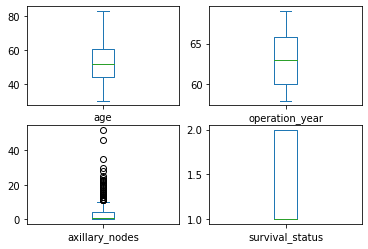

In [7]:
dataframe.plot(kind='box', subplots=True, layout=(2,2), sharex=False, sharey=False)
pyplot.show()

Ящик с усами – это упрощенная гистограмма, на нем можно увидеть асимметрию распределений. Напимер, данные столбца `axillary_nodes` имеют положительную асимметрию, мы видим много точек, находящихся выше ящика, эти точки - значения, которые находятся очень далеко от статистически значимой части данных, а так же линия внутри ящика расположена ниже его середины, а это и говорит нам о положительной ассиметрии.

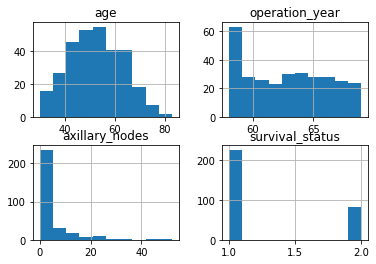

In [8]:
dataframe.hist()
pyplot.show()

При помощи команды (data.hist()) строим гистограмму для каждого столбца данных, т.е. для каждого имени. В моем случае гистограммы были построены для 4 столбцов. Далее при помощи (pyplot.show()) визуализируем гистограммы.
Таким образом, на гистограммах можно увидеть как на них вилияет асимметрия. Напимер, данные столбца `axillary_nodes` имеют положительную асимметрию,что четко видно на гистограмме.

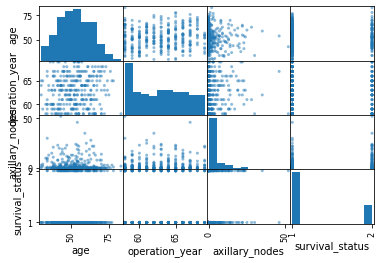

In [9]:
scatter_matrix(dataframe)
pyplot.show()

Создаем  матрицу точечной диаграммы. Каждая точечная диаграмма в матрице визуализирует взаимосвязь между парой переменных, т.е. коррелируют ли переменные. Отображаемые на диаграммах рассеяния паттерны позволяют увидеть разные типы корреляции. Среди них: положительная (оба значения увеличиваются), отрицательная (одно значение увеличивается, в то время как второе уменьшается), нулевая (отсутствие корреляции), линейная, экспоненциальная и подковообразная. Сила корреляции определяется по тому, насколько близко расположены друг от друга точки на графике.

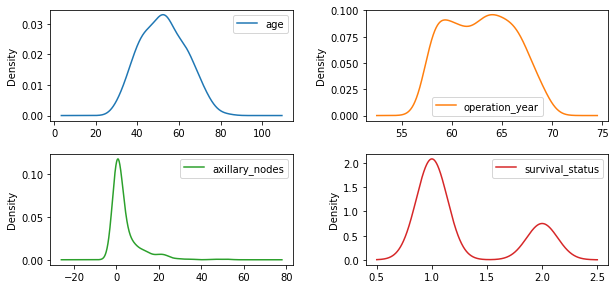

In [10]:
dataframe.plot(kind='kde',subplots=True, figsize=(10,10), layout=(4,2), sharex=False, sharey=False)
pyplot.subplots_adjust(wspace=0.3, hspace=0.3)
pyplot.show()

По нашим данным строим графики плотности, для лучшего представления информации стороим графики отдельно друг от друга, т.е. не в одной системе координат (subplots=True), указываем расположение подграфиков (layout=(4,2)) и делаем размер осей различным для подграфиков. 
На данных графиках тоже можно увидеть влияние асимметрии на них. Напимер, данные столбца `axillary_nodes` имеют положительную асимметрию,что заметно на графике плотностей.

### 4. Evaluating some algorithms

In [11]:
array = dataframe.values
X = array[:,:3]
Y = array[:,3]
validation_size = 0.20
seed = 7
X_train, X_validation, Y_train, Y_validation = train_test_split(X, Y,
test_size=validation_size, random_state=seed)

Разбиваем данные на обучающую и тестовую выборки.

In [12]:
models = []
models.append(('LR', LogisticRegression(solver='liblinear', multi_class='ovr')))
models.append(('LDA', LinearDiscriminantAnalysis()))
models.append(('KNN', KNeighborsClassifier()))
models.append(('CART', DecisionTreeClassifier()))
models.append(('NB', GaussianNB()))
models.append(('SVM', SVC(gamma='auto')))
# evaluate each model in turn
results = []
names = []
for name, model in models:
    kfold = KFold(n_splits=10, random_state=seed, shuffle=True)
    cv_results = cross_val_score(model, X_train, Y_train, cv=kfold, scoring='accuracy')
    results.append(cv_results)
    names.append(name)
    msg = "%s: %f (%f)" % (name, cv_results.mean(), cv_results.std())
    print(msg)

LR: 0.750667 (0.096140)
LDA: 0.758667 (0.084675)
KNN: 0.742333 (0.098187)
CART: 0.659500 (0.101240)
NB: 0.758500 (0.077372)
SVM: 0.734167 (0.100621)


Мы сравнивали между собой алгоритмы логистической регрессии, линейного дискриминантного анализа, алгоритм k-ближайших соседей, алгоритм деревьев классификации, наивный Байесовский алгоритм и алгоритм опорных векторов (Support Vector Machine). Исходя из результатов, полученных на основе средней точности и величины стандартного отклонения, можно сделать о том, что самые точные значения выводят модели, сформированные алгоритмами: `LR`,`LDA`,`NB`, `KNN`, `SVM`.

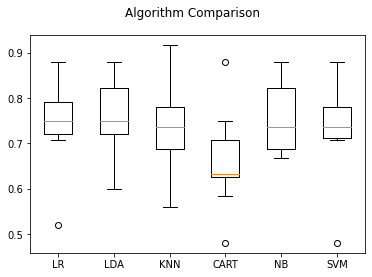

In [13]:
fig = pyplot.figure()
fig.suptitle('Algorithm Comparison')
ax = fig.add_subplot(111)
pyplot.boxplot(results)
ax.set_xticklabels(names)
pyplot.show()

Ассиметрия 1 ящика положительна, так как линия внутри ящика расположена ниже его середины, аналогично с ящиками 2, 3, 4, 5 и 6, ящик 1 и 6 также имеют положительную ассиметрию, однако при этом мы видим точку ниже ящика, эта точка - значение, которой находится очень далеко от статистически значимой части данных.

### 5. Making some predictions

Производим предсказание.

In [14]:
knn = KNeighborsClassifier()
knn.fit(X_train, Y_train)
predictions = knn.predict(X_validation)
print(accuracy_score(Y_validation, predictions))
print(confusion_matrix(Y_validation, predictions))
print(classification_report(Y_validation, predictions))

0.7096774193548387
[[41  4]
 [14  3]]
              precision    recall  f1-score   support

           1       0.75      0.91      0.82        45
           2       0.43      0.18      0.25        17

    accuracy                           0.71        62
   macro avg       0.59      0.54      0.54        62
weighted avg       0.66      0.71      0.66        62



Исходя из полученных данных, сделаем вывод о том,  модель правильно предсказала истинное значение 2 $-$ 3 раза, 4 раз истинным значением оказалось 1, модель правильно предсказала истинное значение 1 $-$ 41 раз, модель правильно предсказала истинное значение 2 $-$ 14 раза.